In [2]:
import os
from getpass import getpass

In [3]:
GOOGLE_API_KEY = getpass()

 ········


In [4]:
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [1]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

from llama_index.core.multi_modal_llms.generic_utils import load_image_urls

image_urls = [
    "https://storage.googleapis.com/generativeai-downloads/data/scene.jpg",
    # Add yours here!
]


In [5]:
image_documents = load_image_urls(image_urls)

In [6]:
image_documents

[ImageDocument(id_='7de6f3c2-ee7b-4322-a50d-bb32b1e1e2c1', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path=None, image_url='https://storage.googleapis.com/generativeai-downloads/data/scene.jpg', image_mimetype=None, text_embedding=None)]

In [7]:
gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

https://storage.googleapis.com/generativeai-downloads/data/scene.jpg


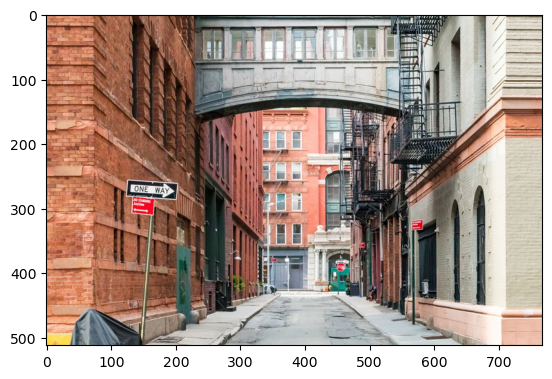

In [8]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

In [9]:
complete_response = gemini_pro.complete(
    prompt="Identify the city where this photo was taken.",
    image_documents=image_documents,
)

In [11]:
complete_response.text

' New York City'